In [1]:
import numpy as np
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 600)

In [2]:
file_prefix='done_'
file_pattern = os.path.join("./data/jira_trem/", f'{file_prefix}*.csv')
csv_files = glob.glob(file_pattern)

dataframes = []
for file in csv_files:
    dataframes.append(pd.read_csv(file))
df = pd.concat(dataframes, ignore_index=True)
df.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project lead id,Project description,Project url,Priority,Resolution,Assignee,Assignee Id,Reporter,Reporter Id,Creator,Creator Id,Created,Updated,Last Viewed,Resolved,Affects versions,Affects versions.1,Affects versions.2,Affects versions.3,Fix versions,Fix versions.1,Fix versions.2,Due date,Votes,Labels,Labels.1,Labels.2,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Watchers.6,Watchers.7,Watchers.8,Watchers Id,Watchers Id.1,Watchers Id.2,Watchers Id.3,Watchers Id.4,Watchers Id.5,Watchers Id.6,Watchers Id.7,Watchers Id.8,Log Work,Log Work.1,Log Work.2,Log Work.3,Log Work.4,Log Work.5,Log Work.6,Log Work.7,Log Work.8,Log Work.9,Original estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Security Level,Inward issue link (Blocks),Outward issue link (Blocks),Inward issue link (Cloners),Outward issue link (Cloners),Inward issue link (Defect),Outward issue link (Defect),Inward issue link (Duplicate),Inward issue link (Polaris datapoint issue link),Inward issue link (Problem/Incident),Outward issue link (Problem/Incident),Inward issue link (Relates),Inward issue link (Relates).1,Inward issue link (Relates).2,Outward issue link (Relates),Outward issue link (Relates).1,Outward issue link (Relates).2,Attachment,Attachment.1,Attachment.2,Attachment.3,Attachment.4,Attachment.5,Attachment.6,Attachment.7,Attachment.8,Attachment.9,Attachment.10,Attachment.11,Attachment.12,Attachment.13,Attachment.14,Attachment.15,Attachment.16,Attachment.17,Attachment.18,Attachment.19,Attachment.20,Custom field (Actual end),Custom field (Actual start),Custom field (Affected hardware),Custom field (Affected services),Custom field (Approvals),Custom field (Backout plan),Custom field (Baseline end date),Custom field (Baseline start date),Custom field (Billable),Custom field (Category),Custom field (Change reason),Custom field (Change risk),Custom field (Change type),Custom field (Checklists),Custom field (Client),Custom field (Craft),Custom field (Date of First Response),Custom field (Date of first comment),Custom field (Dev Estimation (mds)),Custom field (Development),Custom field (End date),Custom field (Engagement Type),Custom field (Epic Color),Custom field (Epic Link),Epic Link Summary,Custom field (Epic Name),Custom field (Epic Status),Custom field (Estimation Zoom Level),Custom field (FirstBundle),Custom field (Flagged),Custom field (Goals),Custom field (Impact),Custom field (Implementation plan),Custom field (Investigation reason),Custom field (Issue Origin),Custom field (Issue color),Custom field (Locked forms),Custom field (Major incident),Custom field (Open forms),Custom field (Operational categorization),Custom field (Pending reason),Custom field (Percentage of allocation in the project),Custom field (Planned end),Custom field (Planned start),Custom field (Product categorization),Custom field (Program Increment),Custom field (Project overview key),Custom field (Project overview status),Custom field (QA Automation Estimation (mds)),Custom field (QA Manual Estimation (mds)),Custom field (Rank),Custom field (Reopen Counter),Custom field (Request Type),Custom field (Request language),Custom field (Request participants),Custom field (Responders),Custom field (Root cause),Satisfaction rating,Custom field (Satisfaction date),Custom field (Scope),Custom field (Sentiment),Custom field (Severity),Custom field (Severity).1,Custom field (Source),Sprint,Sprint.1,Sprint.2,Sprint.3,Sprint.4,Sprint.5,Sprint.6,Sprint.7,Sprint.8,Sprint.9,Sprint.10,Custom field (Start date),Custom field (Story Points),Custom field (Story point estimate),Custom field (Submitted forms),Custom field (TEST Long List),Custom field (TTFR),Custom field (TTR),Custom field (Target end),Custom field (Target start),Custom field (Task progress),Custom field (Team),Custom field (Test Environment),Custom field 

In [3]:
df.shape

(11448, 523)

In [4]:
cols = ['Summary', 'Issue id', 'Issue Type', 'Status', 'Priority', 'Resolution', 'Assignee Id', 'Reporter Id', 
            'Creator Id', 'Created', 'Resolved', 'Affects versions', 'Fix versions', 'Due date', 'Labels', 
            'Description', 'Environment', 'Original estimate', 'Time Spent', 'Security Level', 
            'Custom field (Affected services)',
            'Custom field (Billable)', 'Custom field (Category)', 'Custom field (Issue Origin)',
            'Custom field (Severity)', 'Sprint', 'Custom field (Start date)', 'Custom field (Test Environment)',
            'Parent', 'Status Category', 'Status Category Changed', 'Components']
df = df[cols]
# 重命名一些列名
df =df.rename(columns={
    'Custom field (Affected services)': 'Affected Services',
    'Custom field (Billable)': 'Billable',
    'Custom field (Category)': 'Category',
    'Custom field (Issue Origin)': 'Issue Origin',
    'Custom field (Severity)': 'Severity',
    'Custom field (Start date)': 'Start Date',
    'Custom field (Test Environment)': 'Test Environment'
})
df.head()

,Summary,Issue id,Issue Type,Status,Priority,Resolution,Assignee Id,Reporter Id,Creator Id,Created,Resolved,Affects versions,Fix versions,Due date,Labels,Description,Environment,Original estimate,Time Spent,Security Level,Affected Services,Billable,Category,Issue Origin,Severity,Sprint,Start Date,Test Environment,Parent,Status Category,Status Category Changed,Components
0,when a user log out and other user log in the...,1157113,Bug,Done,Highest,Cannot Reproduce,5e1309decbf1830daa9ce746,5d796147458a170db4b07d69,5d796147458a170db4b07d69,11/Jul/24 3:19 PM,17/Jul/24 9:46 AM,1.4.5,1.4.6 [M],NaN,rbc,when a user is logged out and another user log...,NaN,NaN,NaN,NaN,NaN,No,NaN,Reported by Client post Release,Critical,Sprint 120,NaN,UAT,NaN,Done,17/Jul/24 9:46 AM,NaN
1,Enterprise Users Unable to Login Due to New Lo...,1155756,Bug,Done,Highest,Cannot Reproduce,5e1309decbf1830daa9ce746,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,05/Jul/24 12:00 PM,17/Jul/24 9:45 AM,1.4.5,NaN,05/Jul/24 12:00 AM,rbc,h2. After the recent deployment of the new log...,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Reported by Client post Release,Major,NaN,NaN,UAT,NaN,Done,17/Jul/24 9:45 AM,NaN
2,menus misaligned and unable to scan on PWB o...,1149973,Bug,Done,Highest,Won't Do,5e1309decbf1830daa9ce746,5d796147458a170db4b07d69,5d796147458a170db4b07d69,12/Jun/24 5:36 AM,16/Jul/24 11:45 AM,1.4.3.2,NaN,NaN,rbc,"Hello Team,\n\ncould you please take a look at...",NaN,NaN,7200.0,NaN,NaN,Yes,NaN,Reported by Client during feedback,Critical,NaN,NaN,Prod,NaN,Done,16/Jul/24 11:45 AM,NaN
3,Unable to upload media in PWB,1148947,Bug,Done,Highest,Resolved,557058:1a1ce1d5-7204-4e82-8c91-054565eda5b4,5d796147458a170db4b07d69,5d796147458a170db4b07d69,08/Jun/24 5:11 AM,14/Jun/24 2:06 PM,1.4.3,1.4.5,NaN,rbc,when uploading media using comments or any oth...,NaN,21600.0,20700.0,NaN,NaN,NaN,NaN,Reported by Client during feedback,Critical,Sprint 117,11/Jun/24 3:40 PM,Preprod,NaN,Done,14/Jun/24 3:10 PM,NaN
4,Field display (name and user id) inconsistent ...,1148338,Bug,Done,Highest,Resolved,712020:5e6872a2-61e9-4f04-9779-238a5e6ba048,5ee212569c72bd0ac05bbd01,5ee212569c72bd0ac05bbd01,06/Jun/24 5:47 AM,21/Jun/24 11:25 AM,1.4.3,1.4.5,NaN,NaN,"In sanm uat, We already changed the attribute ...",NaN,28800.0,28800.0,NaN,NaN,NaN,NaN,Reported by Client during feedback,Major,Sprint 118,20/Jun/24 8:11 AM,UAT,270169.0,Done,21/Jun/24 2:26 PM,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Summary                  11448 non-null  object 
 1   Issue id                 11448 non-null  int64  
 2   Issue Type               11448 non-null  object 
 3   Status                   11448 non-null  object 
 4   Priority                 11448 non-null  object 
 5   Resolution               11429 non-null  object 
 6   Assignee Id              11051 non-null  object 
 7   Reporter Id              11448 non-null  object 
 8   Creator Id               11448 non-null  object 
 9   Created                  11448 non-null  object 
 10  Resolved                 11429 non-null  object 
 11  Affects versions         4127 non-null   object 
 12  Fix versions             6887 non-null   object 
 13  Due date                 59 non-null     object 
 14  Labels                

In [6]:
# 删除值大部分为null的列
df.drop(columns=['Environment', 'Components', 'Category', 'Affected Services', 'Security Level', 'Due date'], inplace=True)

In [7]:
# 进行时间转换
df['Created'] = pd.to_datetime(df['Created'])
df['Resolved'] = pd.to_datetime(df['Resolved'])
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Status Category Changed'] = pd.to_datetime(df['Status Category Changed'])
# 计算时间间隔，并转换为小时
#df['Resolved Time'] = (df['Resolved'] - df['Created']).dt.total_seconds() / 60 / 60

# 字段填空
df['Parent'] = df['Parent'].fillna(0)
df['Parent'] = df['Parent'].astype(int)
df['Description'] = df['Description'].fillna('')
df['Issue Origin'] = df['Issue Origin'].fillna('Unknown')
df['Billable'] = df['Billable'].fillna('No')
df['Severity'] = df['Severity'].fillna('Unknown')
df['Labels'] = df['Labels'].fillna('Unknown')
df['Test Environment'] = df['Test Environment'].fillna('Unknown')
df['Assignee Id'] = df['Assignee Id'].fillna('Unknown')
df['Affects versions'] = df['Affects versions'].fillna('Unknown')
df['Assignee Id'] = df['Assignee Id'].fillna('Unknown')

# 生成新字段
df['Week'] = df['Created'].dt.isocalendar().week
df['Month'] = df['Created'].dt.month
df['Summary Length'] = df['Summary'].str.len()
df['Description Length'] = df['Description'].str.len()


In [8]:
# 进行数据转换
df['Parent'] = df['Parent'].apply(lambda x: 1 if x != 0 else 0)
df['Billable'] = df['Billable'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Summary                  11448 non-null  object        
 1   Issue id                 11448 non-null  int64         
 2   Issue Type               11448 non-null  object        
 3   Status                   11448 non-null  object        
 4   Priority                 11448 non-null  object        
 5   Resolution               11429 non-null  object        
 6   Assignee Id              11448 non-null  object        
 7   Reporter Id              11448 non-null  object        
 8   Creator Id               11448 non-null  object        
 9   Created                  11448 non-null  datetime64[ns]
 10  Resolved                 11429 non-null  datetime64[ns]
 11  Affects versions         11448 non-null  object        
 12  Fix versions             6887 no

In [11]:
df['Resolution'].value_counts()

Resolved                   10660
Functions as Designed        381
Cannot Reproduce             115
Duplicate                     84
Invalid                       79
Won't Do                      56
Out of Scope                  21
Out of Date                   19
Not Yet Implemented            5
Not a business priority        3
Declined                       2
Done                           2
Software failure               1
Known Error                    1
Name: Resolution, dtype: int64

In [12]:
df['Status Category'].value_counts()

Done    11448
Name: Status Category, dtype: int64

In [13]:
df['Priority'].value_counts()

Medium     9713
High        697
Low         674
Highest     288
Lowest       76
Name: Priority, dtype: int64

<h2>优先级分类任务</h2>

In [14]:
# 选取有用的列
text_df = df[['Issue id', 'Issue Type', 'Summary', 'Description', 'Parent', 'Issue Origin', 'Reporter Id', 'Assignee Id', 'Billable', 'Severity', 'Affects versions', 'Summary Length', 'Description Length', 'Test Environment', 'Week', 'Month', 'Status Category','Priority']]

In [15]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

priority_value_counts = text_df["Priority"].value_counts()
fig = px.pie(values=priority_value_counts.values, 
             names=priority_value_counts.index,
             color_discrete_sequence=px.colors.sequential.Blues)
fig.update_traces(textfont_size=11,
                  textinfo='percent+label')
fig.update_layout(title_text="Priority Pie Graph",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')
fig.show()

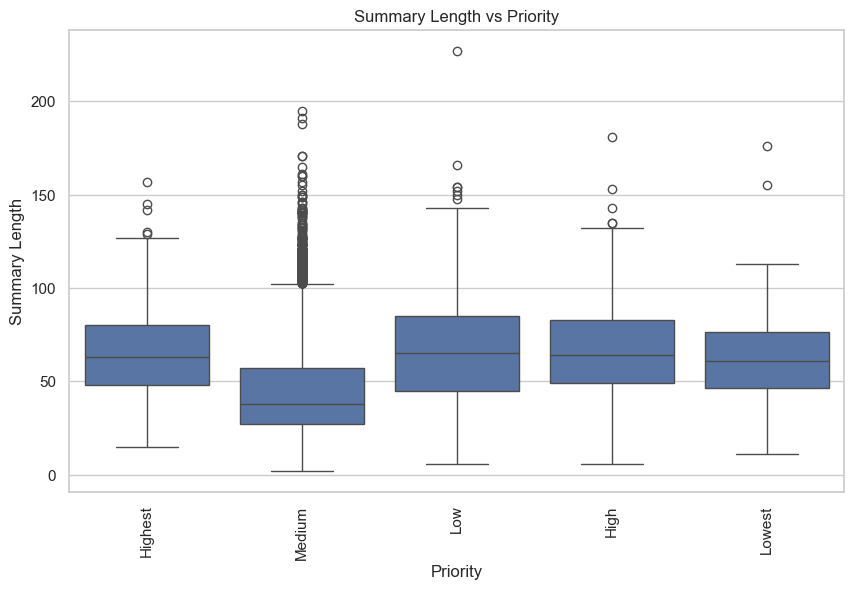

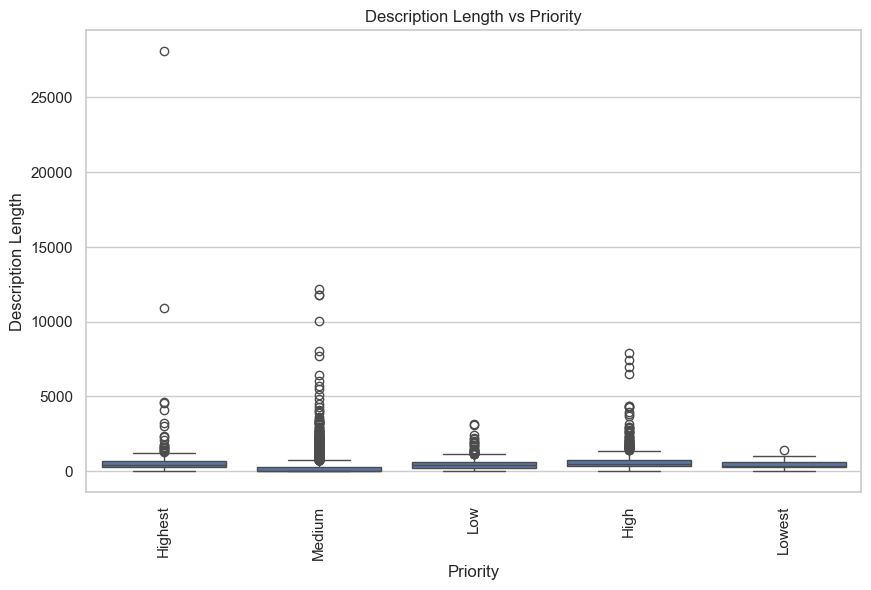

In [16]:
# 数值特征
numeric_features = ['Summary Length', 'Description Length']
# 设置图形风格
sns.set_theme(style="whitegrid")

# 绘制每个数值型特征的Priority分布
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=feature, x='Priority', data=text_df)
    plt.title(f'{feature} vs Priority')
    plt.xticks(rotation=90)
    plt.show()


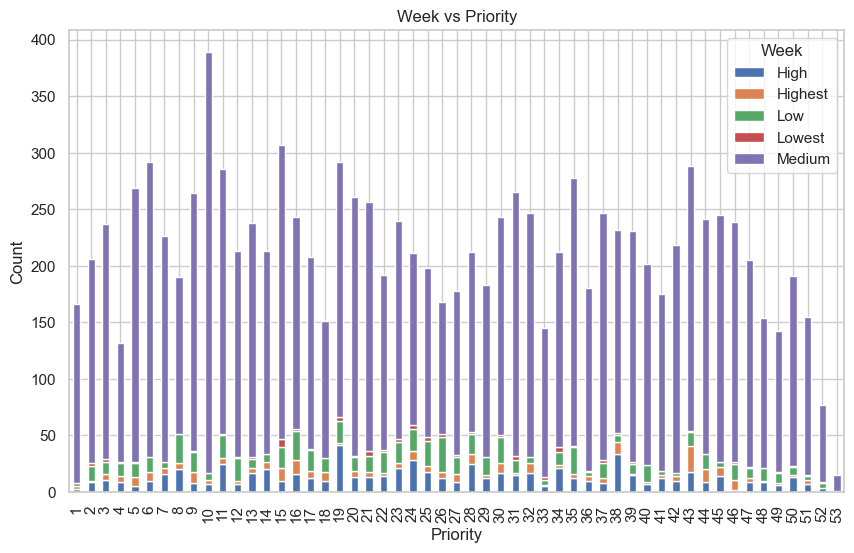

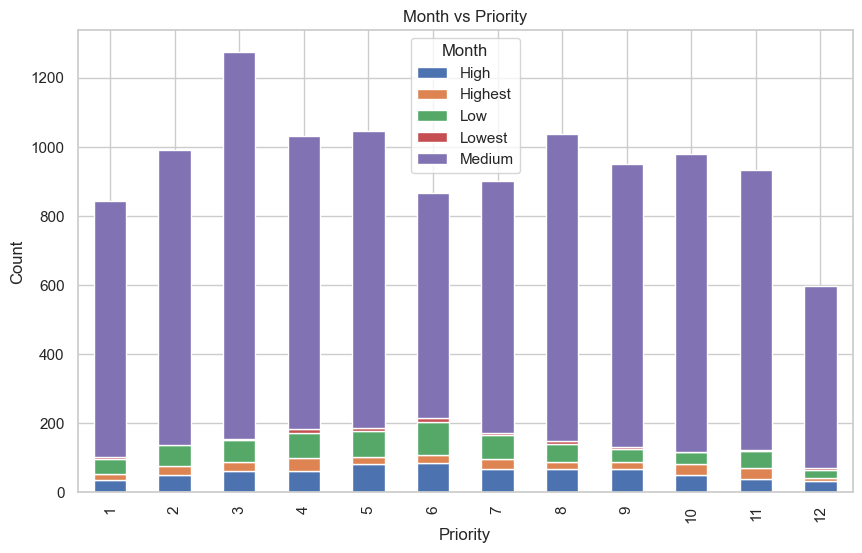

In [17]:
# 数值特征
numeric_features = ['Week', 'Month']
# 设置图形风格
sns.set_theme(style="whitegrid")

# 绘制每个数值型特征的Priority分布
for feature in numeric_features:
    count = text_df.groupby([feature, 'Priority']).size().unstack(fill_value=0)

    # 创建新图像
    plt.figure(figsize=(10, 6))
    # 绘制条形图
    count.plot(kind='bar', stacked=True, ax=plt.gca())
    # 设置标题和标签
    plt.title(f'{feature} vs Priority')
    plt.xlabel('Priority')
    plt.ylabel('Count')
    plt.legend(title=feature)
    #plt.xticks(rotation=90)

    # 显示图形
    plt.show()


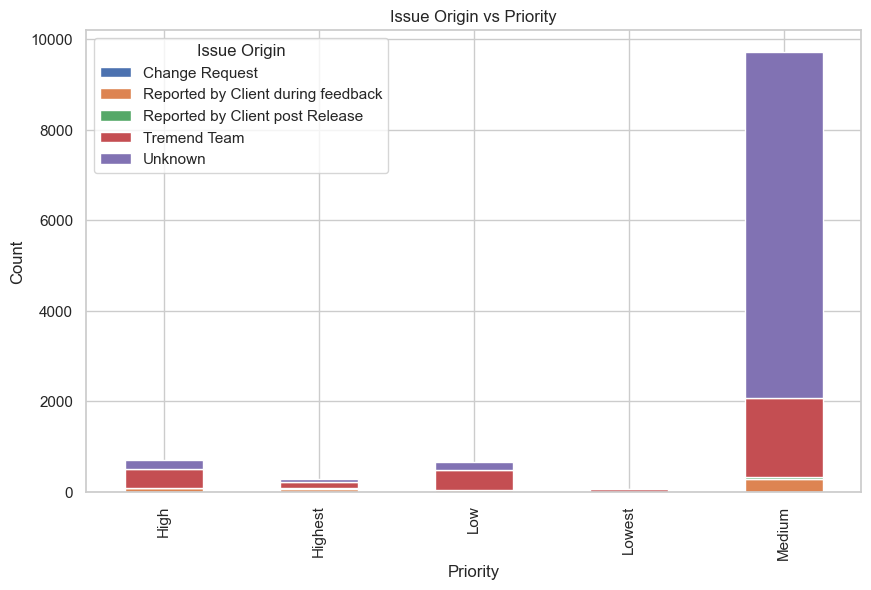

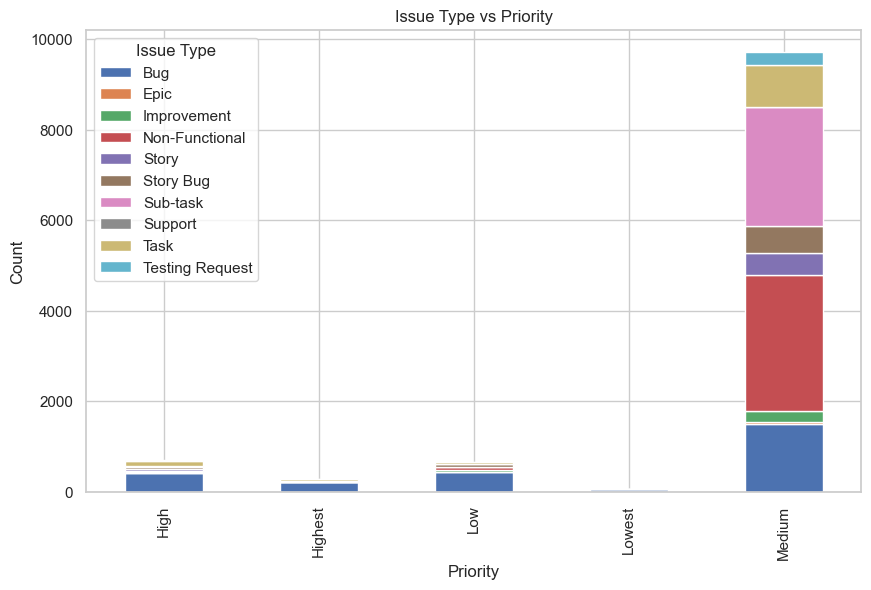

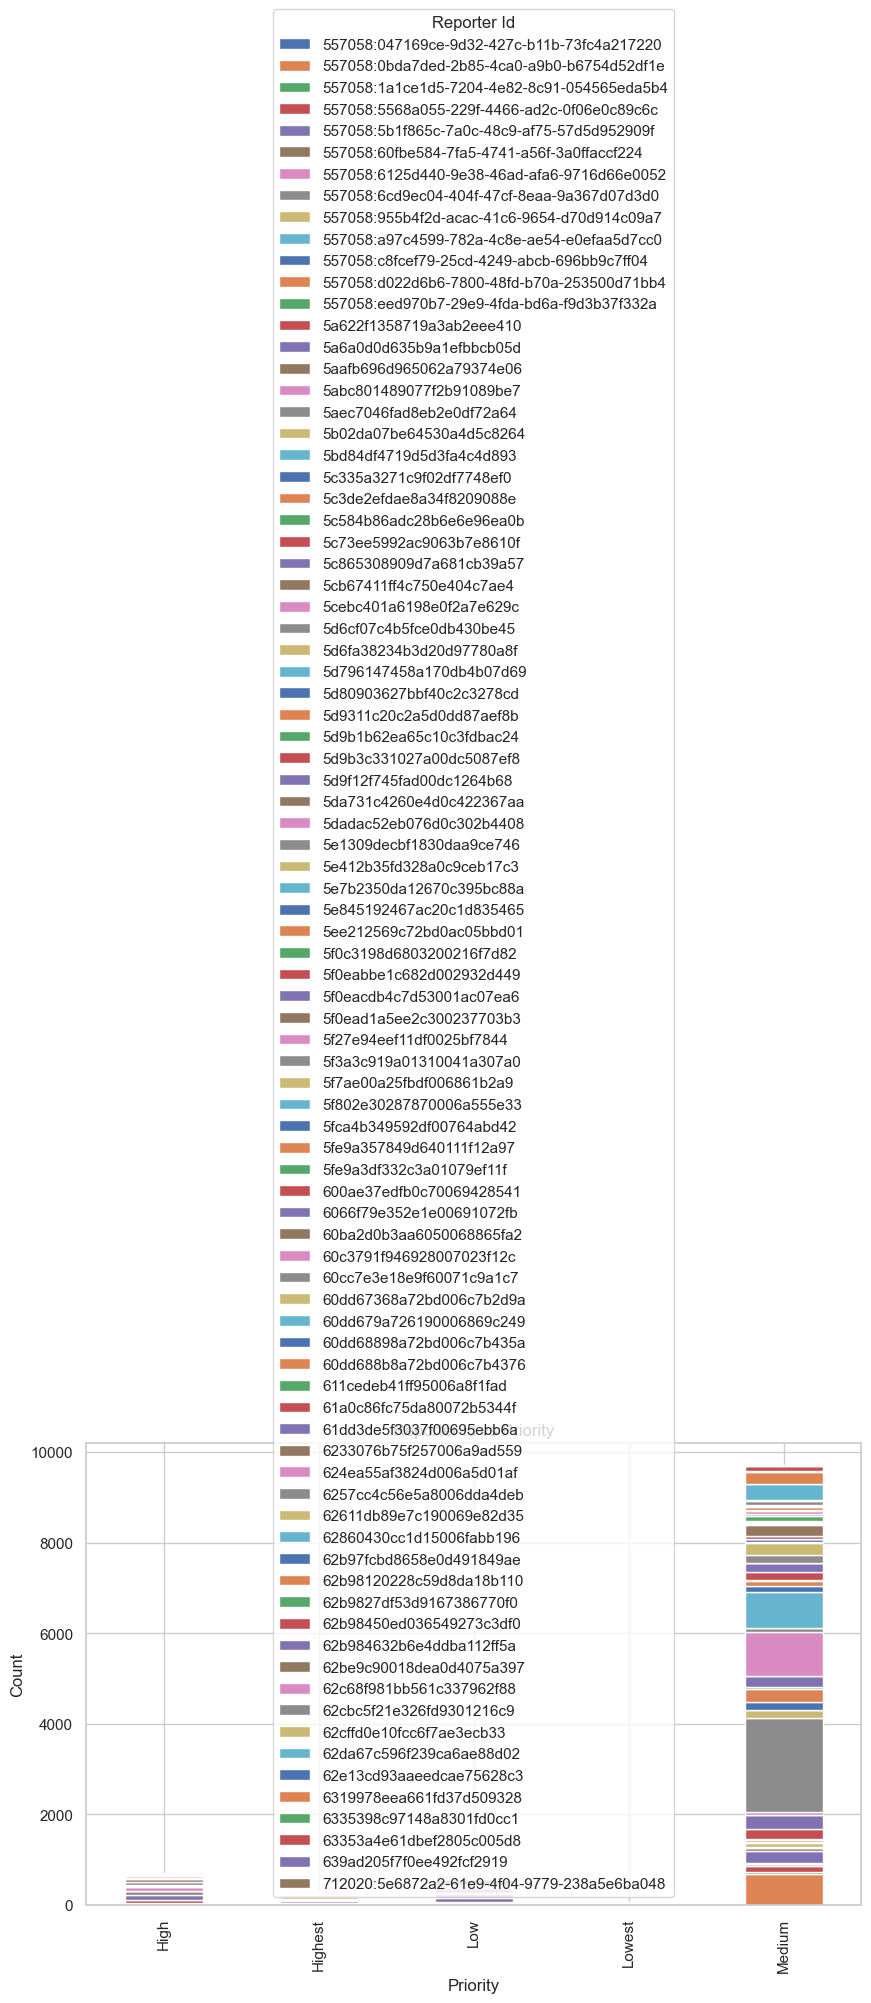

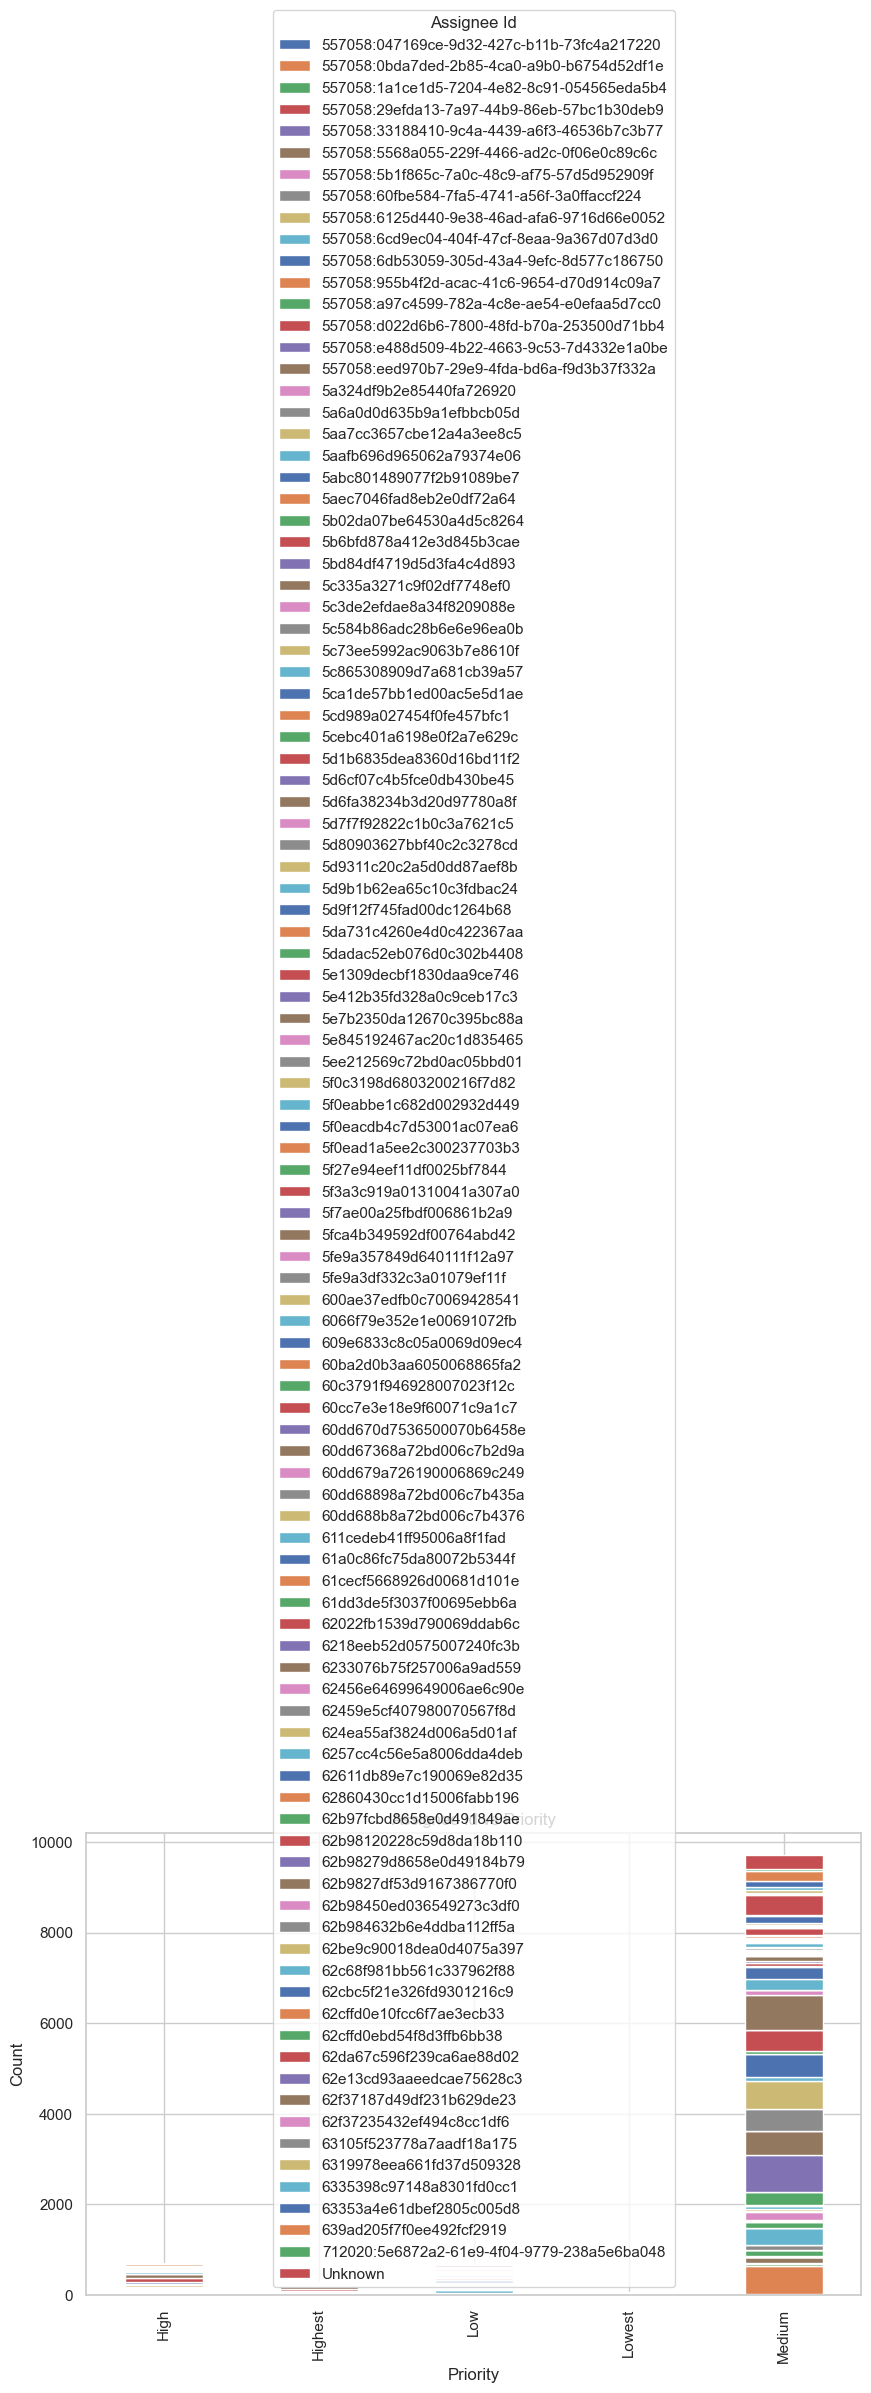

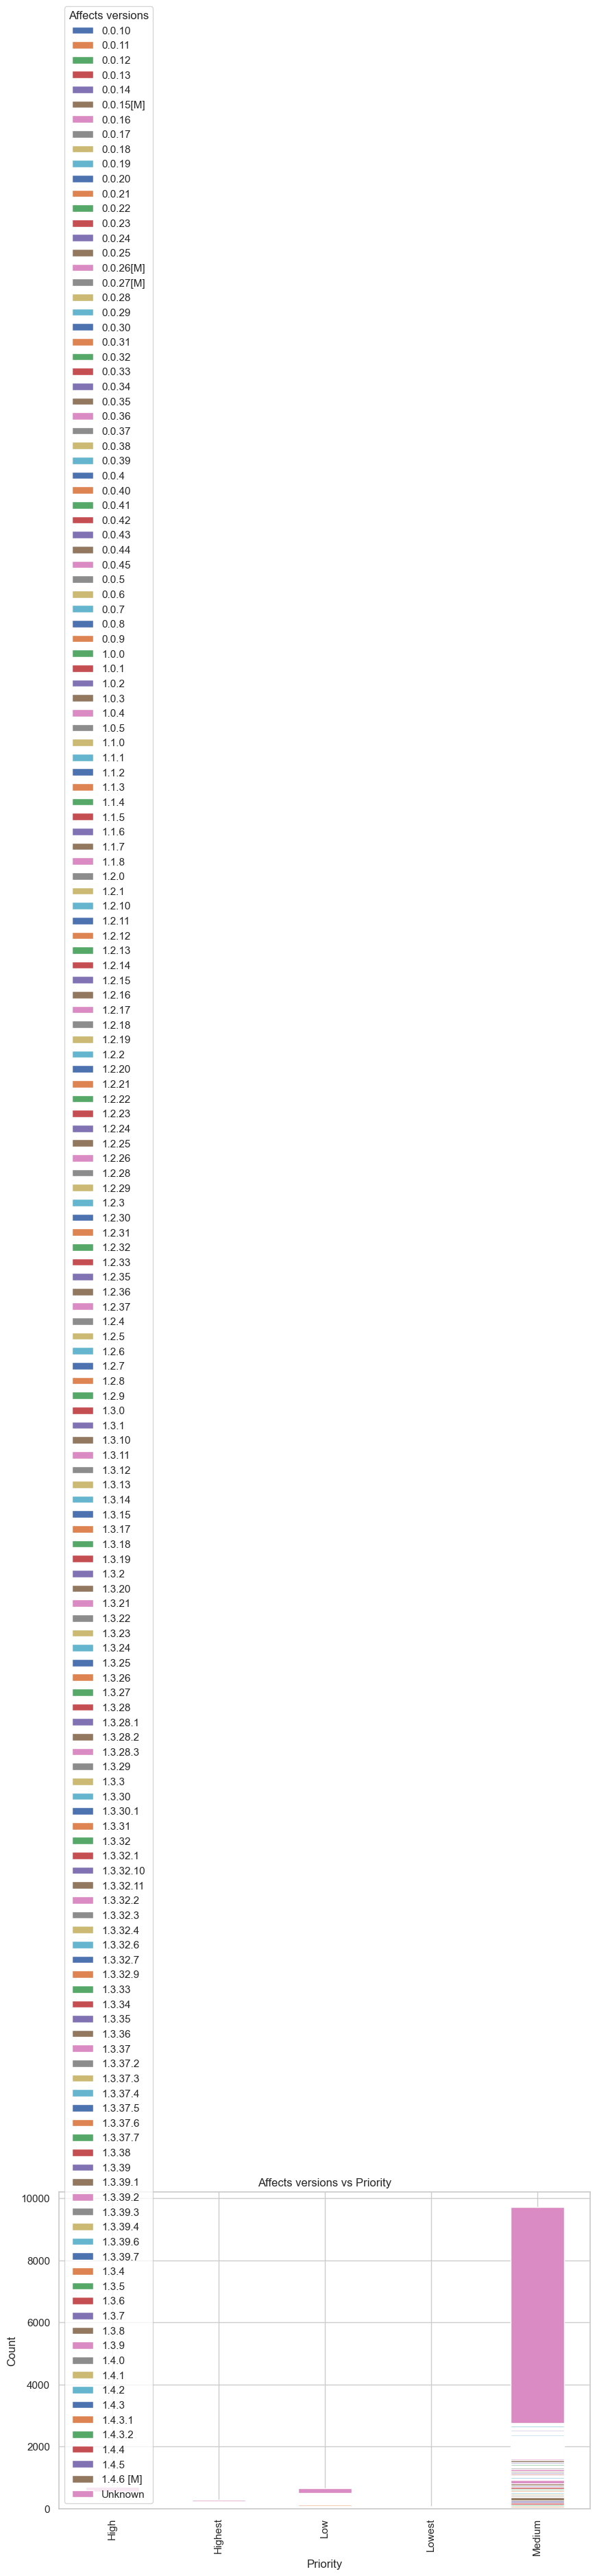

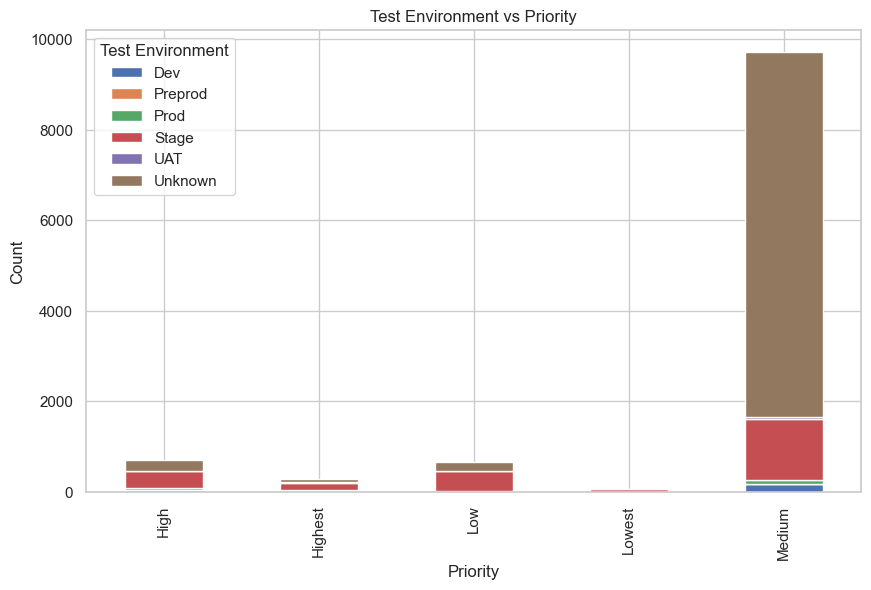

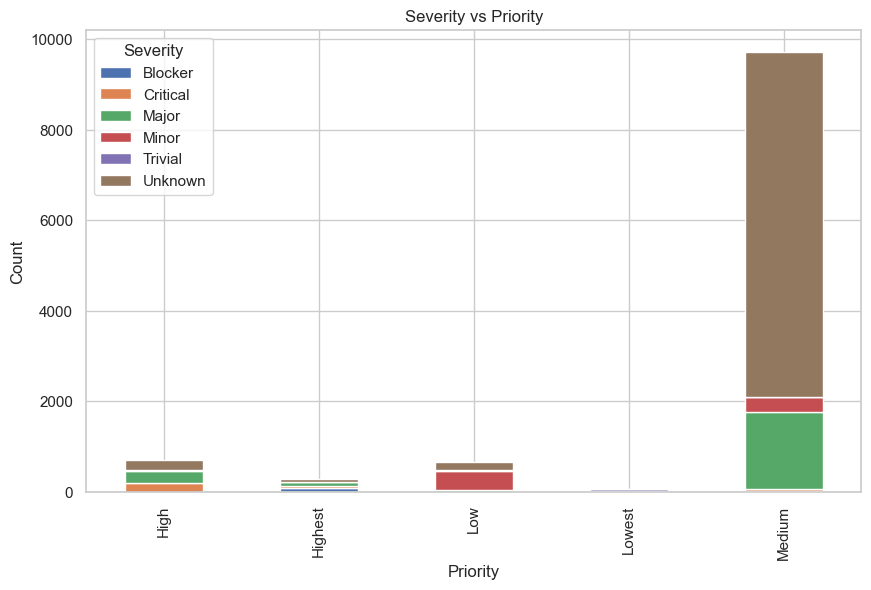

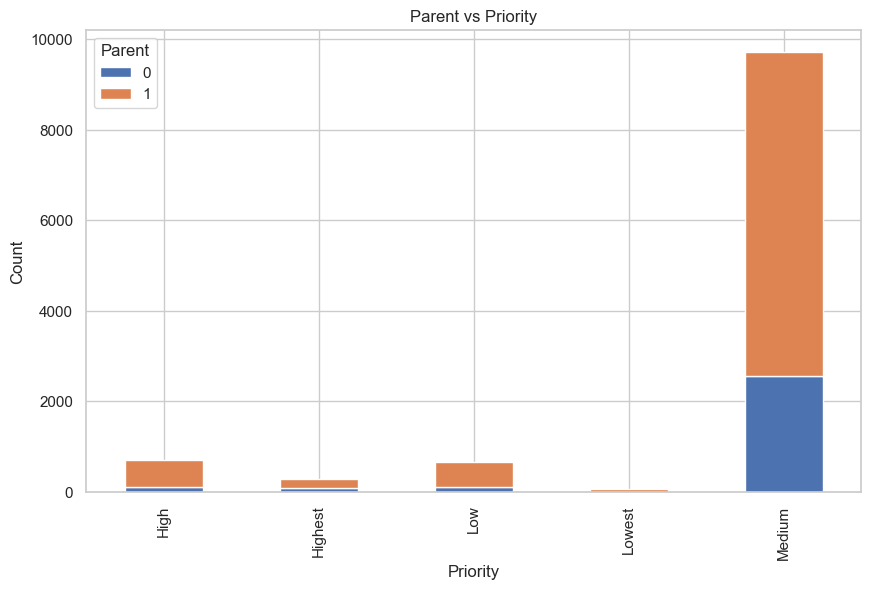

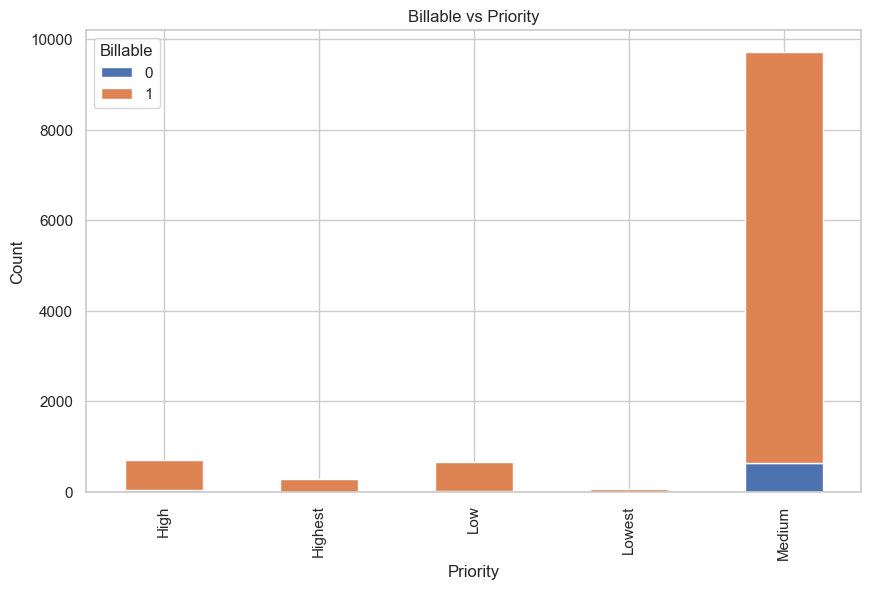

In [18]:
# 特征列表
categorical_features = ['Issue Origin', 'Issue Type', 'Reporter Id', 
                        'Assignee Id', 'Affects versions', 
                        'Test Environment', 'Severity', 
                        'Parent', 'Billable']

# 绘制每个数值型特征的Priority分布
for feature in categorical_features:
    count = text_df.groupby(['Priority', feature]).size().unstack(fill_value=0)

    # 创建新图像
    plt.figure(figsize=(10, 6))
    
    # 绘制条形图
    count.plot(kind='bar', stacked=True, ax=plt.gca())
    
    # 设置标题和标签
    plt.title(f'{feature} vs Priority')
    plt.xlabel('Priority')
    plt.ylabel('Count')
    plt.legend(title=feature)

    # 显示图形
    plt.show()

标签类型字段编码

In [19]:
# 定义优先级映射
priority_mapping = {
    'Lowest': 'L',
    'Low': 'L',
    'Medium': 'M',
    'High': 'H',
    'Highest': 'H'
}
# 将类别数据转换为数值编码
#text_df['priority'] = text_df['Priority'].map(priority_mapping)

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder()
X_cat = encoder.fit_transform(text_df[['Reporter Id', 'Issue Type', 'Assignee Id', 'Issue Origin', 'Affects versions', 'Test Environment', 'Severity']]).toarray()

In [21]:
# 数值字段处理
#numeric_features = text_df[['Summary Length', 'Description Length']]
#scaler = StandardScaler()
#X_numeric = scaler.fit_transform(numeric_features)

文本处理

In [22]:
import string, re, nltk
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [23]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

# 转换为小写
def convert_to_lowercase(text):
    return text.lower()

# 去除文本两边空格
def strip_text(text):
    return text.strip()

# 移除标点符号
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    return re.sub(f"[{re.escape(punct_str)}]", " ", text)

# 移除标题的标点符号
def remove_summary_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    punct_str = punct_str.replace("_", "")
    return re.sub(f"[{re.escape(punct_str)}]", " ", text)

# 移除数字token
def remove_number_token(text):
    words = text.split()
    # 过滤掉纯数字的词
    filtered_words = [word for word in words if not re.match(r'^\d+$', word)]
    # 将词按空格合并成句子
    combined_sentence = ' '.join(filtered_words).strip()
    return combined_sentence

# 移除html标签
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(' ', text)

# 移除表情
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(' ', text)

# 移除http链接
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, " ", text)

# Dictionary of acronyms
acronyms_url = './data/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')
acronyms_list = list(acronyms_dict.keys())

# remove html tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(' ', text)

# 移除文本中包含的image tag
def remove_image_tags(text):
    # Define the regular expression pattern to match the image tags
    pattern = re.compile(r'!.*?!')
    cleaned_text = pattern.sub(' ', text)
    return cleaned_text

# 移除文本中{}的内容
def remove_bracket(text):
    pattern = re.compile(r'\{.*?\}')
    return pattern.sub(' ', text)

# 移除文本中||的内容
def remove_table(text):
    pattern = re.compile(r'\|.*?\|')
    return pattern.sub(' ', text)

# 移除文本中**的内容
def remove_star(text):
    pattern = re.compile(r'\*.*?\*')
    return pattern.sub(' ', text)

# convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

# Dictionary of contractions
contractions_url = './data/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
# List of contractions
contractions_list = list(contractions_dict.keys())

# convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

# 移除停用词
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    
    # 使用正则表达式 tokenizer 处理缩写和标点
    tokenizer = RegexpTokenizer(r'\w+\'?\w+|\w+')
    words = tokenizer.tokenize(text)
    
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Stemming 词干提取，stemming. 如 "running", "runner" 会被转换成 "run".
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

# Lemmatization 词形还原. 如Better被还原为good
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()
def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

# 移除非字母的词
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

# 根据词性过滤单词, 如过滤连词(conjunctions), 介词(prepositions)。保留名词(nouns)、形容词和动词
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'FW', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

# Additional stopwords
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
custom_words = ["thank", "hi", "hello", "regard", "issue", "please", "cc"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others + custom_words

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

def clean_text(text):
    # 按换行符分割文本
    lines = text.split('\n')
    # 过滤以#开始的句子
    filtered_lines = [line for line in lines if not line.startswith(('#', '*'))]
    # 将句子按空格合并为一个句子
    combined_sentence = ' '.join(filtered_lines).strip()
    return combined_sentence

def clean_log(text):
    # 按换行符分割文本
    lines = text.split('\n')
    # 正则表达式匹配时间日期格式
    date_pattern = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'
    # 过滤以时间日期开头的句子
    filtered_lines = [line for line in lines if not re.match(date_pattern, line)]
    # 将句子按空格合并为一个句子
    combined_sentence = ' '.join(filtered_lines).strip()
    return combined_sentence

In [24]:
# 处理标题
def summary_normalizer(text):
    text = strip_text(text)
    text = convert_to_lowercase(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_number_token(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    text = strip_text(text)
    text = re.sub(' +', ' ', text)
    return text

# 处理内容
def description_normalizer(text):
#    text = filter_not_sentence(text)
#    text = clean_text(text)
#    text = clean_log(text)
    text = convert_to_lowercase(text)
    text = strip_text(text)
    text = re.sub('\n', ' ', text) # converting text to one line
    text = re.sub('\[.*?\]', ' ', text) # removing square brackets
    text = remove_http(text)
    text = remove_image_tags(text)
    text = remove_bracket(text)
    text = remove_table(text)
#    text = remove_star(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = text_lemmatizer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    text = re.sub(' +', ' ', text)  # replace multiple spaces with a single space
    text = strip_text(text)
    return text

In [25]:
text_df['normalized_summary'] = text_df['Summary'].apply(summary_normalizer)
text_df['normalized_description'] = text_df['Description'].apply(description_normalizer)
# Text列包含标题和描述以便后面进行一起处理
text_df['normalized_text'] = text_df['normalized_summary'] + ' ' + text_df['normalized_description']

TfidfVectorizer方式提取文本特征

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 文本特征提取
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_text = tfidf.fit_transform(text_df['normalized_text']).toarray()

In [27]:
from sklearn.decomposition import TruncatedSVD
# 使用 Truncated SVD 进行降维
svd = TruncatedSVD(n_components=300, random_state=42)  # 选择目标降维后的特征数
X_text_reduced = svd.fit_transform(X_text)

Word2Vec方式提取文本特征

In [28]:
#from gensim.models import Word2Vec

# 训练 Word2Vec 模型
# vector_size 词向量长度
# window 目标词与上下文词之间的最大距离。设置为 5，表示考虑目标词前后 5 个词作为上下文。
# min_count 忽略频率低于此值的单词。设置为 1，意味着所有单词都会被考虑
# sg = 1, Skip-gram (sg=1): 更适合处理小型数据集，能更好地捕捉到稀疏上下文中的语义关系。
# sg = 0, CBOW 对大规模数据集更有效率，如果数据集较大且语义关系并非非常稀疏，CBOW 可能是更好的选择。
#w2v_model = Word2Vec(sentences = data['normalized_text'], vector_size=150, window=5, min_count=1, sg=1)

# 生成文本向量
#def get_vector(tokens, model, vector_size):
#    vectors = [model.wv[token] for token in tokens if token in model.wv]
#    if len(vectors) == 0:
#        return np.zeros(vector_size)
#    return np.mean(vectors, axis=0)

#vector_size = w2v_model.vector_size
#data['text_vector'] = data['normalized_text'].apply(lambda tokens: get_vector(tokens, w2v_model, vector_size))

# 将文本向量转换为数组
#X_text = np.vstack(data['text_vector'].values)

In [29]:
X_combined = np.hstack((
    X_text_reduced, X_cat, 
    text_df[['Parent', 'Billable', 'Description Length', 'Week', 'Month']]
))

In [30]:
from sklearn.preprocessing import LabelEncoder
# 编码目标变量
le = LabelEncoder()
y_priority = le.fit_transform(text_df['Priority'])

In [31]:
from sklearn.model_selection import StratifiedKFold
# 分割数据集，确保数据平衡
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in stratified_split.split(X_combined, y_priority):
    X_train, X_test = X_combined[train_index], X_combined[test_index]
    y_train, y_test = y_priority[train_index], y_priority[test_index]
    break  # 只需要第一次分割的结果

In [32]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [33]:
# 使用SMOTE处理数据不平衡问题
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# 定义XGBoost分类器
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [34]:
# 设置参数网格
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.2, 0.3],
    'subsample': [0.5, 0.7, 0.9, 1.0]
}

# 使用GridSearchCV进行超参数调优
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc_ovr_weighted', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# 输出最佳参数和得分
print(f"Best: {grid_search.best_score_} using {grid_search.best_params_}")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best: 0.9966795727056345 using {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}


In [37]:
# 使用最佳参数评估模型
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 打印分类报告
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        High       0.46      0.29      0.36       140
     Highest       0.55      0.38      0.45        58
         Low       0.66      0.52      0.58       134
      Lowest       0.58      0.47      0.52        15
      Medium       0.91      0.96      0.94      1943

    accuracy                           0.87      2290
   macro avg       0.63      0.52      0.57      2290
weighted avg       0.86      0.87      0.86      2290



In [39]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight

# 使用SMOTETomek进行过采样和欠采样
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

# 计算类别权重
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# 模型融合
xgb_clf = xgb.XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=500, subsample=0.5, scale_pos_weight=class_weights)
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
lr_clf = LogisticRegression(class_weight='balanced', max_iter=200)
svc_clf = SVC(probability=True, class_weight='balanced')

voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_clf),
    ('rf', rf_clf),
    ('lr', lr_clf),
    ('svc', svc_clf)
], voting='soft')

voting_clf.fit(X_train_smt, y_train_smt)

# 评估模型
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        High       0.46      0.44      0.45       140
     Highest       0.48      0.50      0.49        58
         Low       0.54      0.67      0.60       134
      Lowest       0.64      0.60      0.62        15
      Medium       0.94      0.92      0.93      1943

    accuracy                           0.87      2290
   macro avg       0.61      0.63      0.62      2290
weighted avg       0.87      0.87      0.87      2290

